<a href="https://colab.research.google.com/github/IkeLyons/HW1_LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1



The problem that I am going to try to solve using logistic regression is the problem of trying to predict whether or not a student will be accepted to a graduate engineering program. There are a number of different factors that can contribute to a student being accepted and I am planning on looking at factors like gender, GPA, number of internships, and others. Logistic regression is the best choice for solving this problem because a student will either be accepted to the program or not, and the output of logistic regression is binary. Thus, becuase our problem calls for a binary answer and logistic regression provides a binary answer we use it.

# Task 2

Start by importing the data:

In [56]:
! pip install kaggle

In [57]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [58]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [59]:
! kaggle datasets download tejashvi14/engineering-placements-prediction

engineering-placements-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [60]:
! unzip engineering-placements-prediction.zip

Archive:  engineering-placements-prediction.zip
replace collegePlace.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Begin Exploratory Data Analysis:**

In [61]:
import pandas as pd
import seaborn as sb
dataset = pd.read_csv('collegePlace.csv', encoding='utf-8')
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [62]:
dataset.shape

(2966, 8)

In [63]:
dataset.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

There are no missing values, and thus there wont be any need to remove or change columns/entries in the dataset. Instead lets look at some stats and visualaizations of the data. 

In [64]:
dataset.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [65]:
# taking a look at the correlation of all the values in the dataset
dataset.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


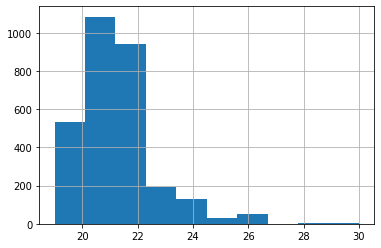

In [66]:
# Distribution of ages
dataset.Age.hist()

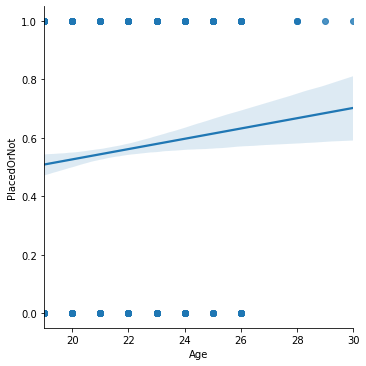

In [67]:
# Seeing if there is any notable correlation betweeen age and placement
sb.lmplot(x='Age', y='PlacedOrNot', data=dataset)

In [68]:
# Look at the amount of internships that applicants had
dataset.Internships.value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

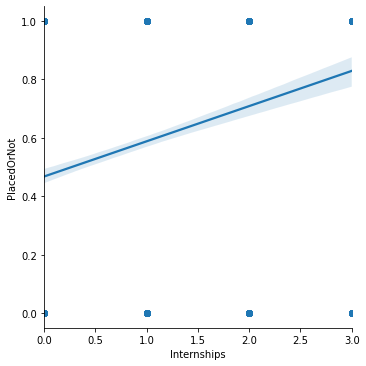

In [69]:
# Check if there is obvious correlation between number of internships and placement
sb.lmplot(x='Internships', y='PlacedOrNot', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


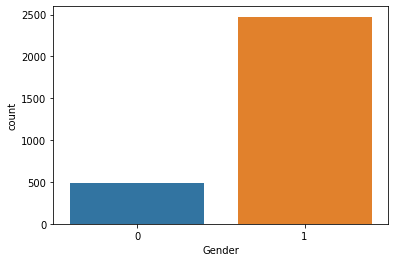

In [55]:
# What is the gender of the applicants
sb.countplot('Gender', data=dataset)

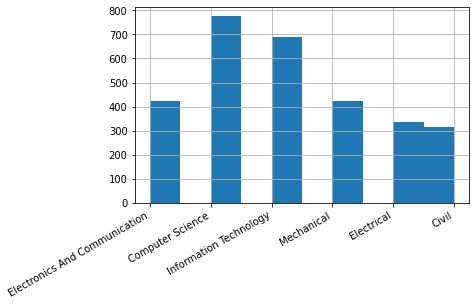

In [48]:
# what majors are applying to this program
dataset.Stream.hist().figure.autofmt_xdate()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


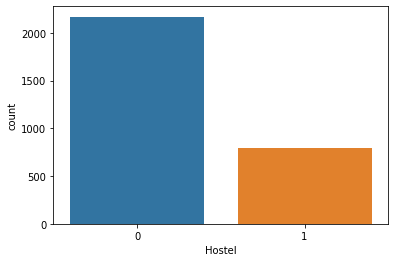

In [42]:
# Did students live in a hostel or not
dataset.Hostel.value_counts()
sb.countplot('Hostel', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


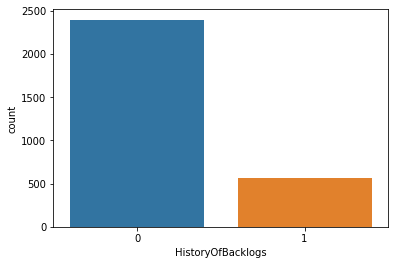

In [45]:
# See how many students have a history of backlog in any subject
dataset.HistoryOfBacklogs.value_counts()
sb.countplot('HistoryOfBacklogs', data=dataset)

One bit of preprocessing that we have to do before we can actually apply logistic regression is to remove all the strings from the dataset. They have to all be turned to integers so that the regression can understand the input. This needs to be done for both the stream and gender columns. This can easily be done with sklearn's label encoder. 

In [53]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
dataset.Stream = encoder.fit_transform(dataset.Stream)
dataset.Gender = encoder.fit_transform(dataset.Gender)
# see if the label encoding worked
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1
